In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


import random

In [11]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [12]:
df.shape

(588101, 7)

In [13]:
df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [14]:
df.tail(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [16]:
df.describe(include='all')

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [18]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

# Data Cleansing

In [19]:
if "Unnamed: 0" in df.columns:
   df =  df.drop(["Unnamed: 0"], axis = 1)

In [20]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
  

In [21]:
# Duplicate row?
dumps = df.duplicated()
print(dumps.any())

False


In [22]:
#Duplicated user_id?
df[df["user_id"].duplicated()].count()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [23]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 588101
Columns         : 6
Features        : ['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']
Missing Values  : 0
Unique Values   : 

user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64


In [24]:
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [25]:
df["converted_int"] = df['converted'].apply(lambda x:1 if x== True else 0)
df["converted_int"].sum()

14843

In [26]:
df.head(5)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


#EDA

In [27]:
def val_count(column):
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x = column)
    plt.title(f'Value Count - {column}')
    plt.show()

# print(df[column].value_counts())
    

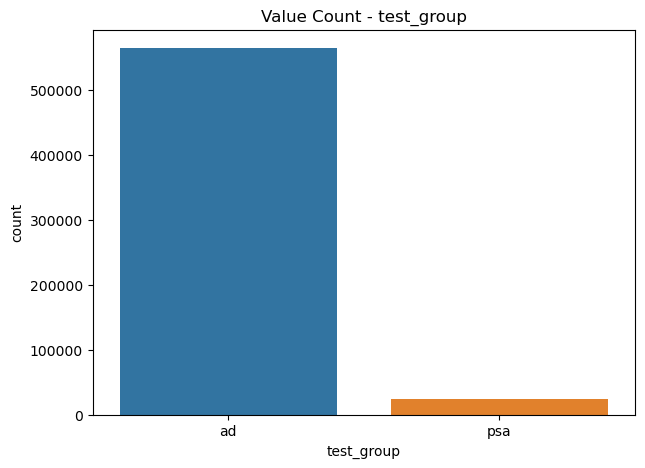

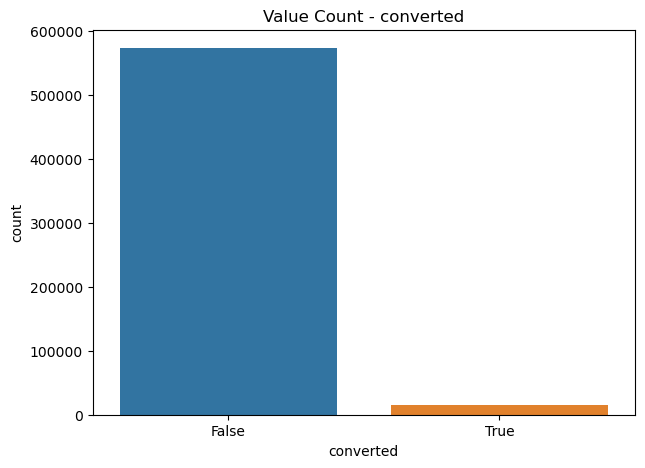

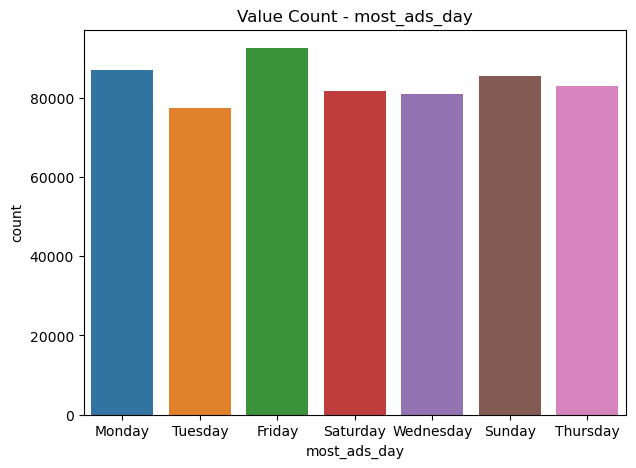

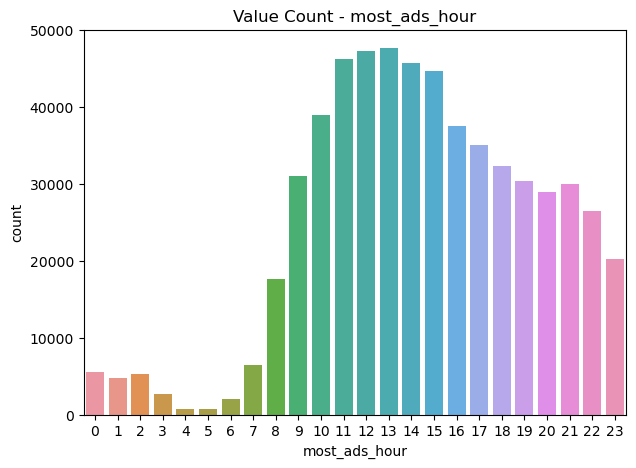

In [28]:
#create columns of interest
col_lst = df.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

 the majority of users saw the ads compared to those the psa 
the most ads seen by a user occurred on Friday and the Monday
Between 10 Am and 3Pm, User saw the most ads 

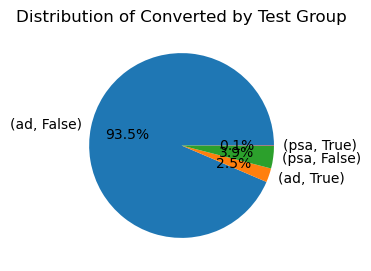

In [29]:
#Groping two columns , and making ploting them on pie chart .

grouped_counts = df.groupby('test_group')['converted'].value_counts()
grouped_counts

# plot data into pie chart
grouped_counts.plot.pie(figsize=(3,3),autopct='%1.1f%%')

# Set the title ans axis labels
plt.title('Distribution of Converted by Test Group')
plt.ylabel('')

#Show the plot

plt.show()

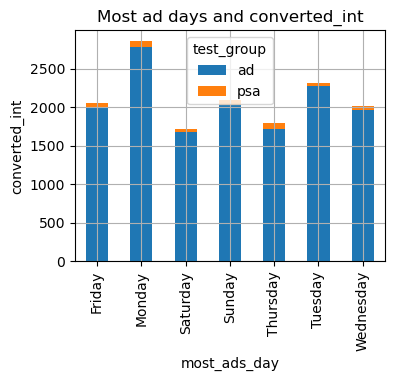

In [30]:
ax =df.groupby(by=['most_ads_day','test_group']).sum()['converted_int'].unstack('test_group').plot(kind='bar', figsize=(4,3), grid = True, stacked = True)
ax.set_ylabel('converted_int')
ax.set_title('Most ad days and converted_int')
plt.show()

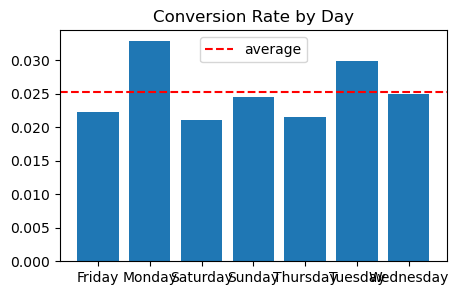

In [31]:
# visualize conversion by day 
df_day_conv = pd.DataFrame(df.groupby('most_ads_day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(5,3))
plt.bar(data=df_day_conv, x='most_ads_day', height = 'converted')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted'].mean(),color='r', linestyle='--',label='average')
plt.legend()
plt.show()
           
           

In [32]:
import math

def sample_size_calculator(population_size, confidence_level, margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p
    
    sample_size = ((z**2) * p * q * population_size) / ((z**2 * q) + ((margin_of_error**2) * (population_size - 1)))
    return math.ceil(sample_size)

In [33]:

#compute sample size 
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :588101 
The required sample size is: 1832


In [34]:
treatment = df.query('test_group =="ad"')
control = df.query('test_group == "psa"')

In [35]:
df.converted.mean() * 100

2.523886203220195

In [36]:
control["converted"].mean()

0.01785410644448223

In [37]:
treatment["converted"].mean()

0.025546559636683747

(array([  2.,   3.,   6.,   6.,  15.,   9.,  28.,  33.,  56.,  69., 101.,
        148., 196., 228., 248., 283., 397., 424., 464., 552., 502., 581.,
        564., 576., 592., 612., 539., 435., 414., 362., 335., 268., 234.,
        187., 149.,  91.,  77.,  64.,  46.,  32.,  21.,  20.,  14.,   4.,
          5.,   3.,   2.,   1.,   1.,   1.]),
 array([0.02451747, 0.02454857, 0.02457968, 0.02461078, 0.02464188,
        0.02467299, 0.02470409, 0.02473519, 0.02476629, 0.0247974 ,
        0.0248285 , 0.0248596 , 0.02489071, 0.02492181, 0.02495291,
        0.02498401, 0.02501512, 0.02504622, 0.02507732, 0.02510843,
        0.02513953, 0.02517063, 0.02520174, 0.02523284, 0.02526394,
        0.02529504, 0.02532615, 0.02535725, 0.02538835, 0.02541946,
        0.02545056, 0.02548166, 0.02551276, 0.02554387, 0.02557497,
        0.02560607, 0.02563718, 0.02566828, 0.02569938, 0.02573048,
        0.02576159, 0.02579269, 0.02582379, 0.0258549 , 0.025886  ,
        0.0259171 , 0.02594821, 0.02597931, 0.

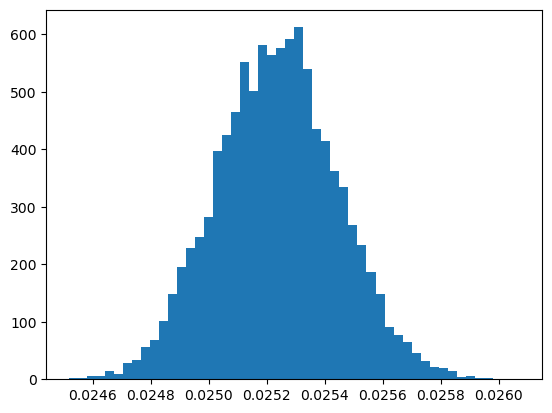

In [38]:
ad_converted = np.random.binomial(len(treatment),
                                  df.converted.mean(), 10000) / len(treatment)

plt.hist(ad_converted, bins=50)

(array([  3.,   2.,   4.,  11.,  21.,  30.,  54.,  38.,  90., 109., 144.,
        147., 278., 325., 273., 418., 370., 549., 587., 415., 610., 450.,
        700., 448., 692., 565., 383., 478., 337., 339., 198., 234., 210.,
        114., 110.,  75.,  72.,  41.,  22.,  19.,  11.,   6.,   6.,   5.,
          3.,   1.,   1.,   1.,   0.,   1.]),
 array([0.02189254, 0.02204472, 0.02219691, 0.02234909, 0.02250128,
        0.02265346, 0.02280565, 0.02295783, 0.02311002, 0.0232622 ,
        0.02341439, 0.02356657, 0.02371876, 0.02387094, 0.02402313,
        0.02417531, 0.0243275 , 0.02447968, 0.02463187, 0.02478405,
        0.02493624, 0.02508842, 0.02524061, 0.02539279, 0.02554498,
        0.02569716, 0.02584935, 0.02600153, 0.02615372, 0.0263059 ,
        0.02645809, 0.02661027, 0.02676246, 0.02691464, 0.02706683,
        0.02721901, 0.0273712 , 0.02752338, 0.02767557, 0.02782775,
        0.02797994, 0.02813212, 0.02828431, 0.02843649, 0.02858868,
        0.02874086, 0.02889305, 0.02904523, 0.

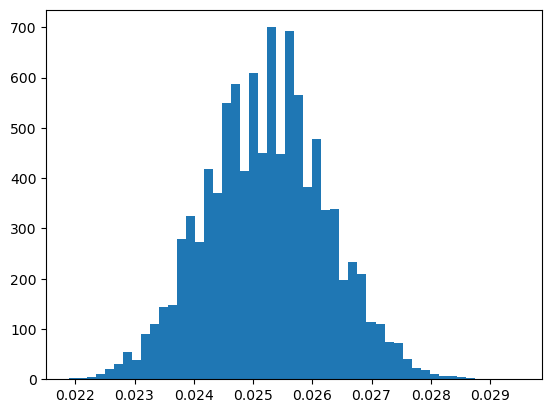

In [39]:
psa_converted = np.random.binomial(len(control),
                                   df.converted.mean(), 10000) / len(control)

plt.hist(psa_converted, bins = 50, align = 'mid', data=None)

In [40]:
p_diffs = ad_converted - psa_converted
p_diffs
p_diffs.mean()

5.335974431282208e-06

In [41]:
# real diff 
# customer who is shows ads bough less
ab_data_diff = treatment['converted'].mean() - control['converted'].mean()
ab_data_diff

0.007692453192201517

Does showing ads to people lead to more purchases? Is this statistically significant or not? Null Hypothesis (H0): Showing ads has no significant effect on the number of purchases. Alternative Hypothesis (H1): Showing ads has a significant effect on the number of purchases.

In [42]:
# is buying less is 

if ab_data_diff > 0 :
    p_value =(p_diffs > ab_data_diff).mean() * 100
else :
    p_value = (p_diffs <= ab_data_diff).mean() * 100

print("P_value =" ,p_value)
if p_value < 0.05:
    print('Reject the null hypothesis. These is a significant difference between the two groups.')

else:
    print('Fail to reject the null hypothesis. There is no significant difference between the two groups.')
    

P_value = 0.0
Reject the null hypothesis. These is a significant difference between the two groups.


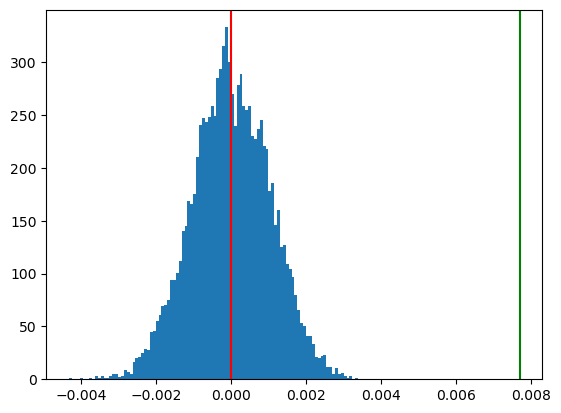

In [43]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

In [44]:
treatment = df.query('test_group =="ad"')
control = df.query('test_group =="psa"')

In [45]:
dif = treatment["converted"].mean() - control["converted"].mean()
dif

0.007692453192201517

In [46]:
conversion = np.array([
    np.append(np.zeros(len(control["converted"])), np.ones(len(treatment["converted"]))),
    np.append(control["converted"],treatment["converted"])
])
conversion_t = conversion.T
conversion_t

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(conversion_t))
        experiment_data = np.array([
            experiment_label,
            conversion_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [48]:
n=2000
p_difs = sh_exp(n)

if dif > 0  : 
    p_value = len(p_difs[p_difs >= dif]) / n * 100
else : 
    p_value = len(p_difs[p_difs <= dif]) / n * 100

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

Reject the null hypothesis. There is a significant difference between the two groups.


C:\Users\amitg\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


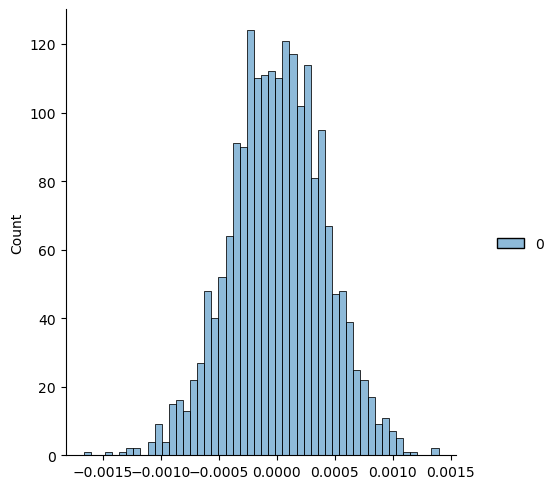

In [49]:
sns.displot(p_difs, bins=50)

T - test

# check distribution of two groups by KDS 

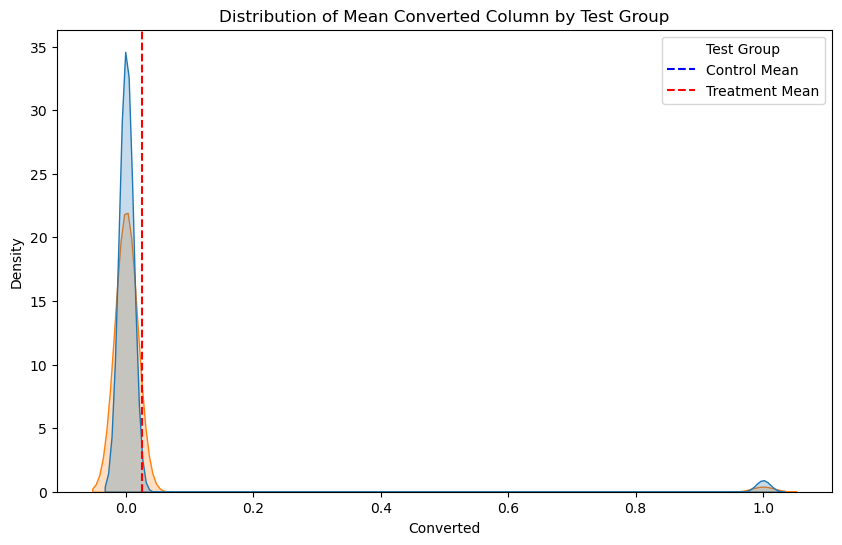

In [59]:
control_mean = df.loc[df['test_group'] == 'pas', 'converted'].mean()
treatment_mean = df.loc[df['test_group'] == 'ad', 'converted'].mean()

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='converted',hue ='test_group', fill=True, common_norm=False)
plt.axvline(control_mean, color ='b', linestyle = "--", label ='Control Mean')
plt.axvline(treatment_mean, color = 'r', linestyle ="--", label = 'Treatment Mean')
plt.title("Distribution of Mean Converted Column by Test Group")
plt.xlabel('Converted')
plt.ylabel('Density')
plt.legend(title='Test Group')
plt.show()


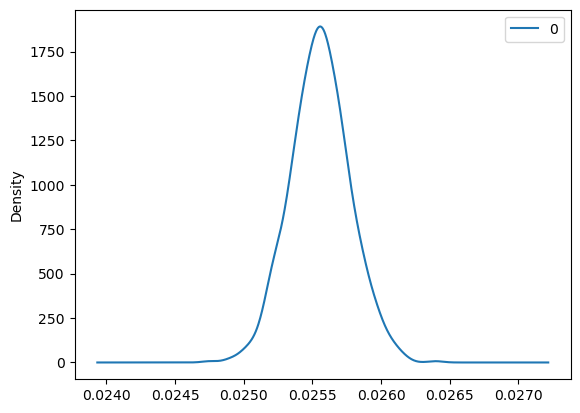

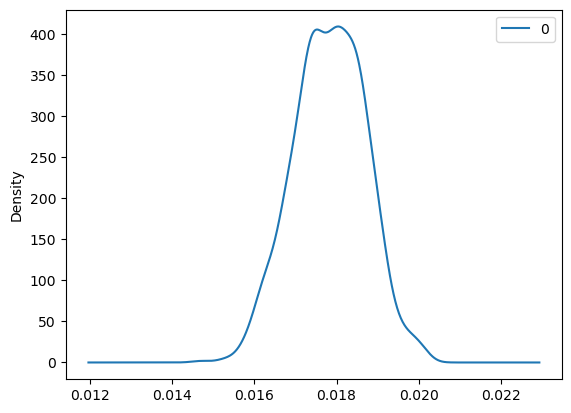

In [60]:
boot_treatment=[]
for i in range(1000):
    boot_mean = treatment.sample(frac=1, replace =True)['converted'].mean()
    boot_treatment.append(boot_mean)
boot_treatment=pd.DataFrame(boot_treatment)
boot_treatment.plot(kind='density');

boot_control =[]

for i in range(1000):
    boot_mean=control.sample(frac=1,replace=True)['converted'].mean()
    boot_control.append(boot_mean)
    
boot_control=pd.DataFrame(boot_control)
boot_control.plot(kind='density');


In [67]:
def t_test(treatment_data, control_data) :
    
    t_statistic, p_value = stats.ttest_ind(treatment_data, control_data)
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    
    if p_value < 0.05 :    
        print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
    else:
        print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')

    return t_statistic, p_value
    

# Perform a t-test to compare the means of the two groups
t_statistic, p_value = t_test(treatment["converted"], control["converted"])

T-statistic: 7.37040597428566
P-value: 1.7033052627831264e-13
Reject the null hypothesis. There is a significant difference between the two groups.


# Does the display of advertisments correlate the number of purchases or not? 


In [68]:
ct = pd.crosstab(df['test_group'], df['converted'], margins= True)

ct

converted,False,True,All
test_group,,,
ad,550154,14423,564577
psa,23104,420,23524
All,573258,14843,588101


In [71]:
d = np.array([ct.iloc[0][:-1].values, ct.iloc[1][:-1].values])
d

array([[550154,  14423],
       [ 23104,    420]], dtype=int64)

In [72]:
chi2, p_value, dof, expected  =stats.chi2_contingency(ct)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 54.318051591383124
P-value: 4.5144265218984724e-11
Degrees of freedom: 4
Expected frequencies:
[[550327.71899045  14249.28100955 564577.        ]
 [ 22930.28100955    593.71899045  23524.        ]
 [573258.          14843.         588101.        ]]


In [73]:
if p_value < 0.05:
    print ( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print ('Fail to reject the null hypothesis. There is no significant difference between the two groups.')

Reject the null hypothesis. There is a significant difference between the two groups.


In [29]:
import numpy as np
from scipy import stats

# Data
n_A = 5000
k_A = 200
p_A = k_A / n_A

n_B = 5000
k_B = 250
p_B = k_B / n_B

# Pooled probability
p_pooled = (k_A + k_B) / (n_A + n_B)

# Standard error
SE = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_A + 1/n_B))

# Z-score
z = (p_A - p_B) / SE

# P-value (two-tailed test)
p_value = 2 * stats.norm.cdf(z)

# Output results
print(f"Conversion Rate A: {p_A:.2%}")
print(f"Conversion Rate B: {p_B:.2%}")
print(f"Z-score: {z}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant. Implement the change!")
else:
    print("The difference is not statistically significant. Do not implement the change.")


Conversion Rate A: 4.00%
Conversion Rate B: 5.00%
Z-score: -2.4119153509747395
P-value: 0.015868965355166954
The difference is statistically significant. Implement the change!


In [66]:
import numpy as np
import scipy.stats as stats

# Observed data
observed = np.array([[30, 70],
                     [20, 80]])

# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-squared: 2.16
P-value: 0.14164469029513255
Degrees of freedom: 1
Expected frequencies:
[[25. 75.]
 [25. 75.]]
